In [201]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import json
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import seaborn as sns;
import scipy
import os

from data_utils import *
from plot_utils import *

matplotlib.rcParams['figure.dpi']= 150

colors = sns.color_palette("hls", n_colors=11)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


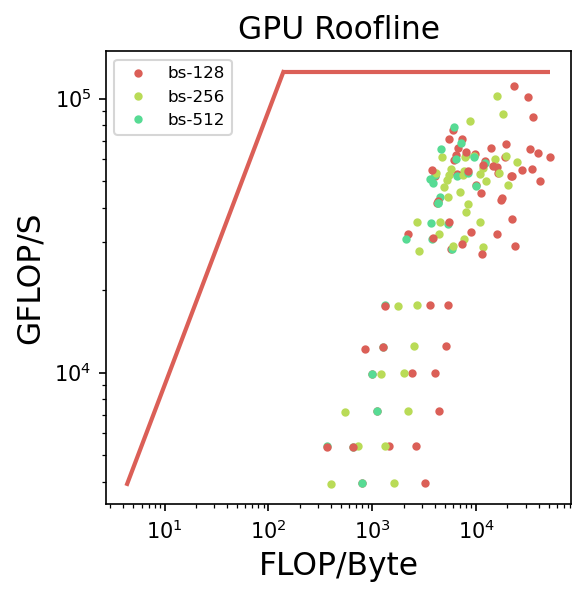

In [202]:
color_dim = 'bs'
f, ax = plt.subplots(figsize=(4,4))
d_v100_conv2d = get_data('v100_conv2d')
d_v100_conv2d = filter_data({'bs':[128, 256, 512]}, d_v100_conv2d)

f, ax, m = plot_roofline(f, ax, d_v100_conv2d, flops_peak=125e3, membdw_peak=900, color_dim=color_dim, marker='o', title='GPU Conv2d Roofline')

# sort the legend
handles, ls = ax.get_legend_handles_labels()
ls = [int(i) for i in ls if i.isdigit()] 
ls, handles = zip(*sorted(zip(ls, handles), key=lambda t: t[0]))
ls = [color_dim + '-' + str(i) for i in ls]
ax.legend(handles, ls, frameon=True, fontsize=8)

## Ascend 910 Roofline

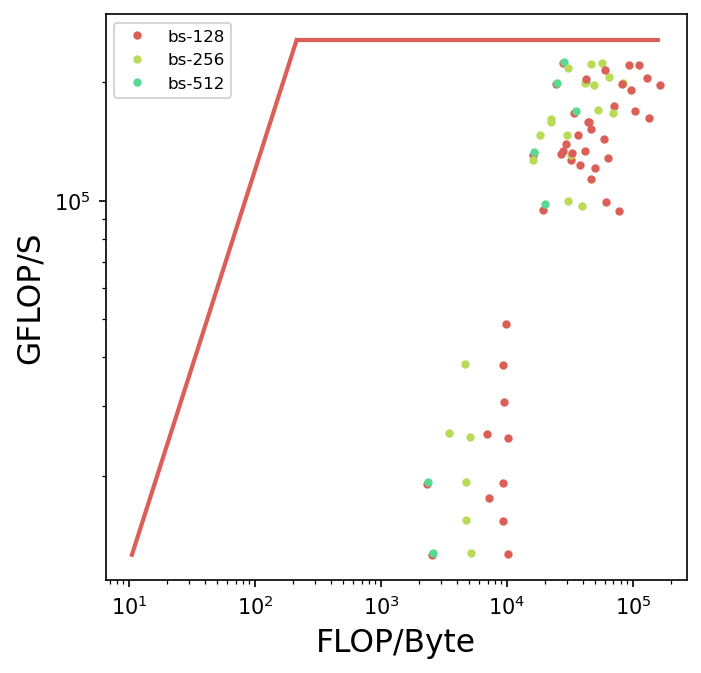

In [198]:
color_dim = 'bs'
d_ascend910_conv2d = get_data('ascend910_conv2d')

f, ax = plt.subplots(figsize=(5,5))
f, ax, m = plot_roofline(f, ax, d_ascend910_conv2d, flops_peak=256e3, membdw_peak=1200, color_dim=color_dim, marker='o', title='')

# sort the legend

handles, ls = ax.get_legend_handles_labels()
ls = [int(i) for i in ls if i.isdigit()] 
ls, handles = zip(*sorted(zip(ls, handles), key=lambda t: t[0]))
ls = [color_dim + '-' + str(i) for i in ls]
ax.legend(handles, ls, frameon=True, fontsize=8)

## linear analysis

In [218]:
d_ascend910_linear = get_data('ascend910_linear')
ascend910_peak_flops = 256e12

print(f"ascend910 total data points:  {len(d_ascend910_linear['labels'])}")
d_ascend910_linear_flops = np.array(d_ascend910_linear['flops'])
indices = np.where(d_ascend910_linear_flops > 0.0)
d_ascend910_linear_flops = d_ascend910_linear_flops[indices]
print(f"ascend910 flops that > 0: {d_ascend910_linear_flops.size}")

ascend910 total data points:  192
ascend910 flops that > 0: 183


In [219]:
d_v100_linear = get_data('v100_linear')
v100_peak_flops = 125e12

print(f"v100 total data points:  {len(d_v100_linear['labels'])}")
d_v100_linear_flops = np.array(d_v100_linear['flops'])
indices = np.where(d_v100_linear_flops > 0.0)
d_v100_linear_flops = d_v100_linear_flops[indices]
print(f"ascend910 flops that > 0: {d_v100_linear_flops.size}")

v100 total data points:  192
ascend910 flops that > 0: 192


### max flops

In [220]:
max_index = np.argmax(d_ascend910_linear['flops'])
max_flops = d_ascend910_linear['flops'][max_index]
print(f"max flops {max_flops} FLOPS%: {max_flops/ascend910_peak_flops}")
print(f"max flops with label {d_ascend910_linear['labels'][max_index]}")

max flops 220161240764370.4 FLOPS%: 0.8600048467358219
max flops with label bs_1024-input_32768-output_8192


### min flops

In [221]:
min_index = 0
min_flops = 256e12
for i in range(len(d_ascend910_linear['labels'])):
    if d_ascend910_linear['state'][i] == "fine" and d_ascend910_linear['flops'][i] < min_flops:
        min_index = i
        min_flops = d_ascend910_linear['flops'][i]
print(f"min flops {min_flops} FLOPS%: {min_flops/peak_flops}")
print(f"min flops with label {d_ascend910_linear['labels'][min_index]}")

min flops 1024797486058.0781 FLOPS%: 0.008198379888464625
min flops with label bs_256-input_512-output_512


['bs', '1024']
['input', '8192']
['output', '16384']
check x y [ 1.33630621 -0.38338149  0.00301875] 1.201865890767819


/home/u20200002/.conda/envs/torch1.5/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


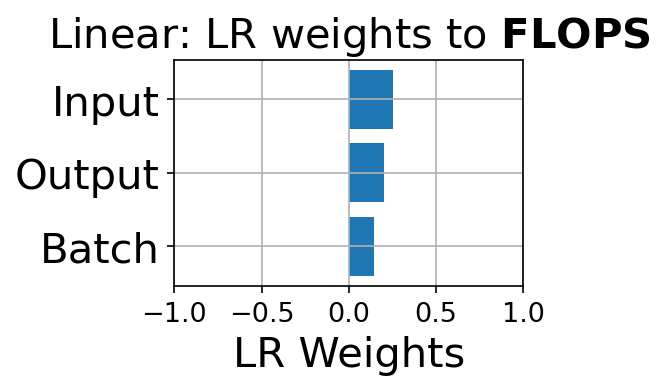

In [222]:
from ml_utils import *
f = regression(d_ascend910_linear['labels'], d_ascend910_linear['flops'],
               title = r'Linear: LR weights to $\bf{FLOPS}$')

length of speedups 183
max speedup: 5.641890785283965 label: bs_256-input_65536-output_16384
min speedup: 0.21818632848930164 label: bs_1024-input_512-output_1024
bs [256, 512, 1024]
input [512, 1024, 2048, 4096, 8192, 16384, 32768, 65536]
output [512, 1024, 2048, 4096, 8192, 16384, 32768, 65536]
-----------------------


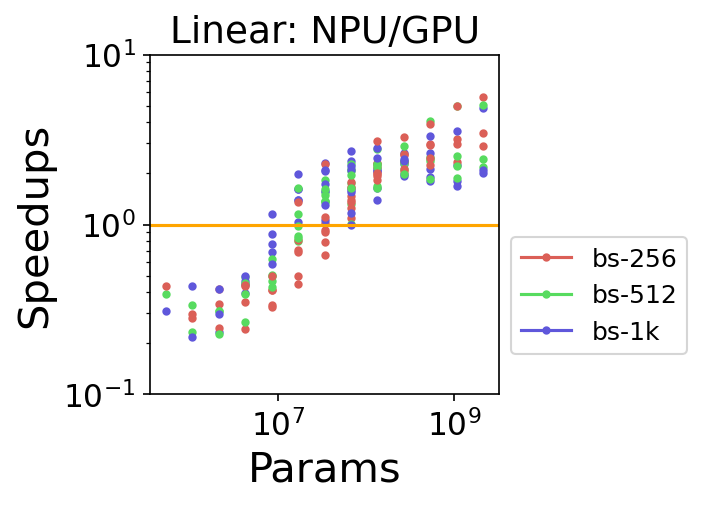

In [223]:
from plot_utils import *
f = speedup_params(d_ascend910_linear['labels'], d_ascend910_linear['example_per_sec'], 
               d_v100_linear['labels'], d_v100_linear['example_per_sec'], d_v100_linear['params'],  marker='.', lim=[0.1, 10],
                   legend_box=(1,0.5),
               color='bs', title= 'Linear: NPU/GPU')

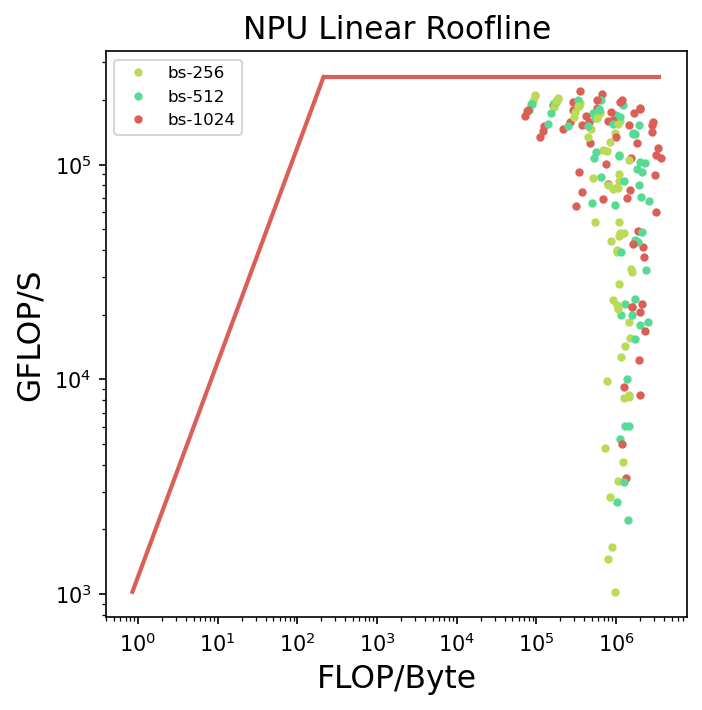

In [224]:
color_dim = 'bs'

f, ax = plt.subplots(figsize=(5,5))
f, ax, m = plot_roofline(f, ax, d_ascend910_linear, flops_peak=256e3, membdw_peak=1200, color_dim=color_dim, marker='o', title='NPU Linear Roofline')

# sort the legend

handles, ls = ax.get_legend_handles_labels()
ls = [int(i) for i in ls if i.isdigit()] 
ls, handles = zip(*sorted(zip(ls, handles), key=lambda t: t[0]))
ls = [color_dim + '-' + str(i) for i in ls]
ax.legend(handles, ls, frameon=True, fontsize=8)

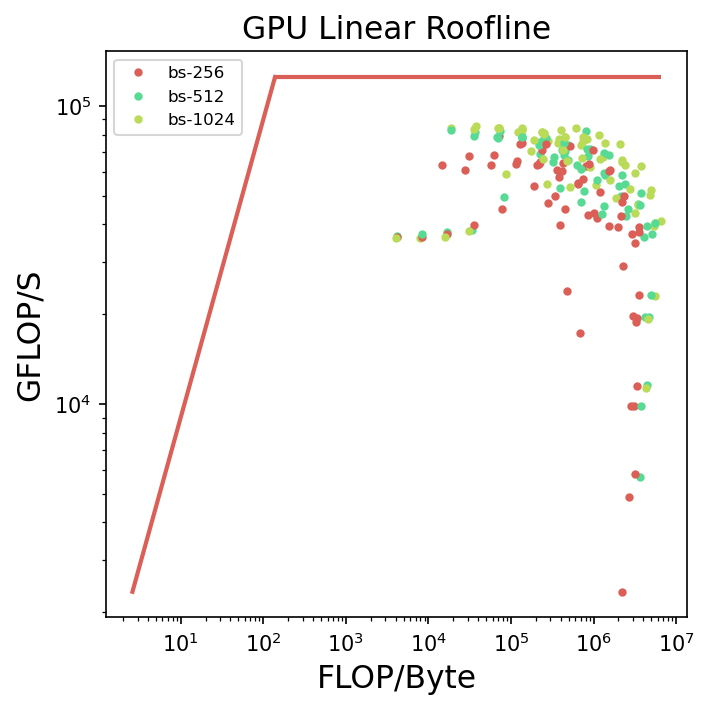

In [226]:
f, ax = plt.subplots(figsize=(5,5))
f, ax, m = plot_roofline(f, ax, d_v100_linear, flops_peak=125e3, membdw_peak=900, color_dim=color_dim, marker='o', title='GPU Linear Roofline')

# sort the legend

handles, ls = ax.get_legend_handles_labels()
ls = [int(i) for i in ls if i.isdigit()] 
ls, handles = zip(*sorted(zip(ls, handles), key=lambda t: t[0]))
ls = [color_dim + '-' + str(i) for i in ls]
ax.legend(handles, ls, frameon=True, fontsize=8)

## Ascend910 RNN analysis

In [145]:
d_v100_rnn = get_data('v100_rnn')
d_ascend910_rnn = get_data('ascend910_rnn')

length of speedups 92
max speedup: 1.2387612842190645 label: bs_512-seqlen_128-embedingsize_512-hiddensize_8192
min speedup: 0.011576818455587641 label: bs_64-seqlen_128-embedingsize_512-hiddensize_512
bs [64, 128, 256, 512]
seqlen [128, 256, 512]
embedingsize [512, 2048, 8192]
hiddensize [512, 2048, 8192]
-----------------------


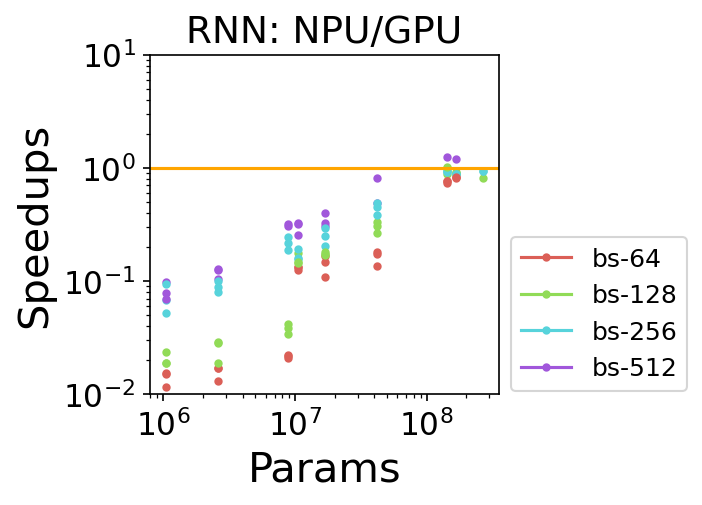

In [148]:
f = speedup_params(d_ascend910_rnn['labels'], d_ascend910_rnn['example_per_sec'], 
               d_v100_rnn['labels'], d_v100_rnn['example_per_sec'], d_v100_rnn['params'],  marker='.', lim=[0.01, 10],
                   legend_box=(1,0.5),
               color='bs', title= 'RNN: NPU/GPU')

length of speedups 44
max speedup: 7.270015250479452 label: bs_128-input_224-inchannel_64-outchannel_128-filtersize_5
min speedup: 1.2509137657576572 label: bs_128-input_224-inchannel_128-outchannel_256-filtersize_7
bs [128]
input [224, 448]
inchannel [32, 64, 128]
outchannel [64, 128, 256]
filtersize [1, 3, 5, 7]
-----------------------


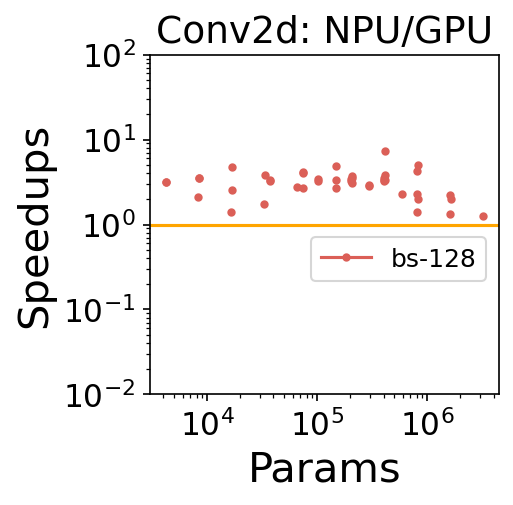

In [149]:
d_v100_conv2d = get_data('v100_conv2d')
d_ascend910_conv2d = get_data('ascend910_conv2d')
conv2d_speedup = speedup_params(d_ascend910_conv2d['labels'], d_ascend910_conv2d['example_per_sec'], 
               d_v100_conv2d['labels'], d_v100_conv2d['example_per_sec'], d_v100_conv2d['params'],  marker='.', lim=[0.01, 100],
                   legend_box=(1,0.5),
               color='bs', title= 'Conv2d: NPU/GPU')